## Logistic Regression

Logistic Regressions applies a non-linear transformation to the linear regression output in order to bring the output in the range $[0:1]$. 

Populating the interactive namespace from numpy and matplotlib


/root/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['logistic', 'indices', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


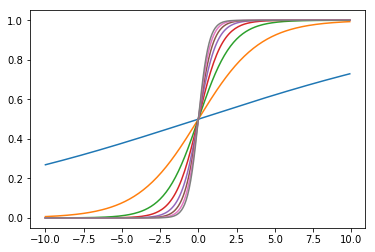

In [2]:
%pylab inline
import numpy as np
import pylab as pl 
from sklearn import linear_model
from sklearn import datasets

def sigmoid(x,beta,offset = 0.0):
    return 1/(1+np.exp(-beta*x + offset))
pl.figure() 
x = np.arange(-10, 10,0.1)
for beta in np.arange(0.1,3.0,0.4):
    pl.plot(x, sigmoid (x, beta))
    


#### Logistic Regression for Classification

Since logistic regression prodcues outputs close to 0 and +1 it can be used to train a classification problem, like the IRIS data set, with labels 0 and +1 (or -1 and +1 by using a `tanh` function)

In [3]:
iris = datasets.load_iris()

np.random.seed(0)
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test  = iris.data[indices[-10:]]
iris_y_test  = iris.target[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)  

logistic = linear_model.LogisticRegression(C=1e5)

logistic.fit(iris_X_train, iris_y_train)



LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [4]:
print ("Predicted flower classes:\t", logistic.predict(iris_X_test))
print ("True flower classes     :\t", iris_y_test)
print ("correct classifciation? :\t", logistic.predict(iris_X_test) 
                                     == iris_y_test)
print ("classifc. error (in %)  :\t", \
      np.sum(logistic.predict(iris_X_test) == iris_y_test)*100.0\
      /len(iris_y_test))

Predicted flower classes:	 [1 2 1 0 0 0 2 1 2 0]
True flower classes     :	 [1 1 1 0 0 0 2 1 2 0]
correct classifciation? :	 [ True False  True  True  True  True  True  True  True  True]
classifc. error (in %)  :	 90.0


## Multiclass, Multilabel Classification


- **Multiclass-Classifier:** A classifier is capable to select from more than one class, i.e. a flower can be assigned to seritosa, vertigo and virsicolor
- **Multilabel-Classifier:** An example is assigned to one or more classes

Our original regression problem only predicted one variable ($y$), which translates into a binary classification model, i.e. an example is assigned to a class or not.

If possible, Scikit learn automatically extends the estimators to multiclass-labels, according to the following strategies. 

Multiclass problems can be decomposed into binary classification problems:

- "One vs. All" approach: One classifier per class trained against all other classes
- "One vs. One" approach: There are $k$ classifiers for a class (assuming we have $k$ classes). An example is assigned to the class that has won most often. 

See the [sklearn documentation](http://scikit-learn.org/stable/modules/multiclass.html) for details.

#### One vs. All Decision Surfaces for the Logistic Regression on the IRIS Data

Automatically created module for IPython interactive environment


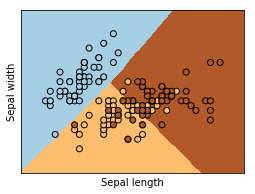

In [5]:
print(__doc__)


# Code source: Gael Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
